## 고객 세그멘테이션 실습 
- UCI 레포지토리, online reail 엑셀파일 사용
- https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

In [1]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
retail_df = pd.read_excel('./data/retail/online_retail_II.xlsx')

In [ ]:
retail_df_ = pd.read_excel(io = './data/retail/online_retail_II.xlsx')
retail_df.head(3)

In [3]:
retail_df.head(30)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
retail_df.loc[retail_df[retail_df['Customer ID'].isnull()].index, :]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [12]:
retail_df.describe() # 숫자열에 대한것만.

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


### 데이터 문제점
- Quantity, Price 의 최소값이 minus 이다. 분포 등의 확인을 통해 데이터 신뢰성 확인 필요하다
- Customer ID 는 수치적인 분석은 필요없을것이고, 다만 Null 값 비중이 크므로 Null 처리가 필요하다

- 다음주에 계속

-그냥 스킵되었음. 알아서 책보고 해보기

In [13]:
# Quantity, Price > 0 앤 애들만 남도록 필터링
retail_df = retail_df[retail_df['Quantity']>0]
retail_df = retail_df[retail_df['Price']>0]
retail_df = retail_df[retail_df['Customer ID'].notnull()]
retail_df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

데이터에서 Country 는 영국이 대부분을 차지함. 데이터 해석이 왜곡없도록 하기위해 영국데이터만 남기기

In [15]:
retail_df = retail_df[retail_df['Country']=='United Kingdom']
retail_df.shape

(370929, 8)

### RFM 기반
- Recency최근 상품구매일, Frequency구매 빈도, Monetary value총 구매 금액

In [16]:
## RFM 기반 데이터 가공
retail_df['sale_amount'] = retail_df['Quantity']*retail_df['Price']

C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
# Customer ID float -> int로 변경 (편리한 식별성을 위해)
retail_df['Customer ID']= retail_df['Customer ID'].astype(int)

C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
retail_df['Customer ID'].value_counts().head()

17841    5043
14606    3866
12748    2633
17850    2499
16549    2269
Name: Customer ID, dtype: int64

In [19]:
retail_df.groupby('Customer ID')['sale_amount'].sum().sort_values(ascending=False)[:10]

Customer ID
18102    349164.35
13694    131443.19
17511     84541.17
15061     83284.38
16684     80489.21
16754     65500.07
17949     60117.60
13089     57912.03
15311     56003.26
17450     52422.30
Name: sale_amount, dtype: float64

-상위 5명이 많은 세일을 차지한다.

In [23]:
# Invoice + StockCode(PK복합키와 같은 개념)로 그룹바이 => 1에 가까운 식별자 레벨
retail_df.groupby(['Invoice','StockCode'])['Invoice'].count().mean()

1.0351343281082996

###  RFM 기반으로 데이터를 변경하기
- Recency최근 상품구매일, Frequency구매 빈도, Monetary value총 구매 금액

In [24]:
aggregations = {
    'InvoiceDate' :'max'
    ,'Invoice' : 'count'
    ,'sale_amount':'sum'
}

In [25]:
# DataFrame 의 groupby()의 멀티플 연산을 위해 agg() 이용
cust_df = retail_df.groupby('Customer ID').agg(aggregations)

In [27]:
cust_df.head()

,InvoiceDate,Invoice,sale_amount
Customer ID,,,
12346,2010-06-28 13:53:00,33,372.86
12608,2010-10-31 10:49:00,16,415.79
12745,2010-08-10 10:14:00,22,723.85
12746,2010-06-17 10:41:00,17,254.55
12747,2010-12-05 15:38:00,154,5080.53


In [28]:
# groupby된 컬럼 값을 Recency, Frequency, Monetary 로 변경
cust_df = cust_df.rename(columns={'InvoiceDate':'Recency'
                                 , 'Invoice':'Frequency'
                                 , 'sale_amount':'Monetary'
                                 })
cust_df = cust_df.reset_index()
cust_df.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,2010-06-28 13:53:00,33,372.86
1,12608,2010-10-31 10:49:00,16,415.79
2,12745,2010-08-10 10:14:00,22,723.85
3,12746,2010-06-17 10:41:00,17,254.55
4,12747,2010-12-05 15:38:00,154,5080.53


In [31]:
# Recency 컬럼 추가 가공 : 최근 주문한 날짜로부터 현재까지 일수(현재날짜는 2011.12.10으로 가정)
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']

In [33]:
cust_df.head(3)

,Customer ID,Recency,Frequency,Monetary
0,12346,529 days 10:07:00,33,372.86
1,12608,404 days 13:11:00,16,415.79
2,12745,486 days 13:46:00,22,723.85


In [36]:
# 위에서 일자 데이터만 추출
cust_df['Recency']= cust_df['Recency'].apply(lambda x : x.days + 1)

In [38]:
# 최종 RFM 형식으로 가공된 데이터 프레임 확인
cust_df.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,530,33,372.86
1,12608,405,16,415.79
2,12745,487,22,723.85
3,12746,541,17,254.55
4,12747,370,154,5080.53


### RFM 기반 고객 세그먼테이션

(array([3.952e+03, 1.200e+01, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.9500000e+00, 3.4919090e+04, 6.9835230e+04, 1.0475137e+05,
        1.3966751e+05, 1.7458365e+05, 2.0949979e+05, 2.4441593e+05,
        2.7933207e+05, 3.1424821e+05, 3.4916435e+05]),
 <a list of 10 Patch objects>)

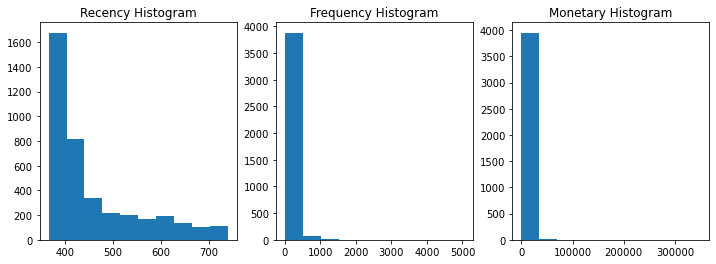

In [40]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize = (12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

In [41]:
cust_df.describe()

,Customer ID,Recency,Frequency,Monetary
count,3969.000000,3969.000000,3969.000000,3969.000000
mean,15561.406148,456.095742,93.456538,1868.167287
std,1582.099836,97.072657,183.306124,7380.830030
min,12346.000000,366.000000,1.000000,2.950000
25%,14201.000000,383.000000,18.000000,304.200000
50%,15577.000000,417.000000,43.000000,669.910000
75%,16941.000000,501.000000,102.000000,1655.640000
max,18287.000000,739.000000,5043.000000,349164.350000


값 왜곡정도가 심하다

p.461 부터 해보기